# Import 

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

# Load the dataset

In [2]:
games = pd.read_csv('games.csv')

 # Print the names of the columns in dataset

In [3]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


# Shape of dataset

In [4]:
games.shape

(81312, 20)

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [6]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


# Make a histogram of all the ratings in the average rating column

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

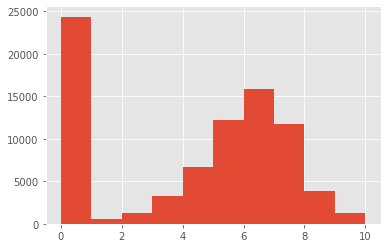

In [7]:
plt.hist('average_rating',data = games)

# Display the first rows of all the games with zero rating

In [8]:
games[games['average_rating'] == 0][:1] 

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0


# Display the first rows of all the games greater than zero rating

In [9]:
games[games['average_rating'] > 0][:1] 

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785


# Make a boxplot of all the ratings in the average rating column


{'whiskers': [<matplotlib.lines.Line2D at 0x14b6b2c1f60>,
 'caps': [<matplotlib.lines.Line2D at 0x14b6b2cf8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b6b2c1e10>],
 'medians': [<matplotlib.lines.Line2D at 0x14b6b2cff60>],
 'fliers': [<matplotlib.lines.Line2D at 0x14b6b2cfef0>],
 'means': []}

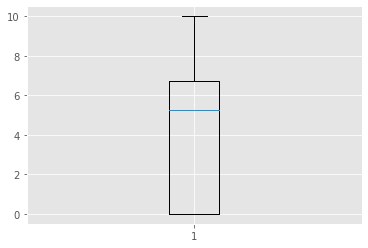

In [10]:
plt.boxplot(games['average_rating'])

# Remove any rows without user reviews

In [11]:
games = games[games['users_rated'] > 0]

# Remove any rows with missing values

In [12]:
games = games.dropna(axis = 0)

# Make a histogram of all the ratings in the average rating column


(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

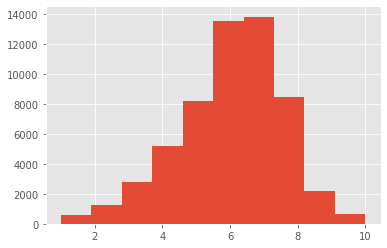

In [13]:
plt.hist(games['average_rating'])

# Make a Boxplot of all the ratings in the average rating column


{'whiskers': [<matplotlib.lines.Line2D at 0x14b6bbb0f98>,
 'caps': [<matplotlib.lines.Line2D at 0x14b6bbbc668>,
 'boxes': [<matplotlib.lines.Line2D at 0x14b6bbb0ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x14b6bbbccf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x14b6bbbcdd8>],
 'means': []}

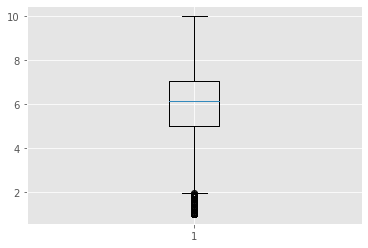

In [14]:
plt.boxplot(games['average_rating'])

# Correlation matrix

In [15]:
corrmat = games.corr()

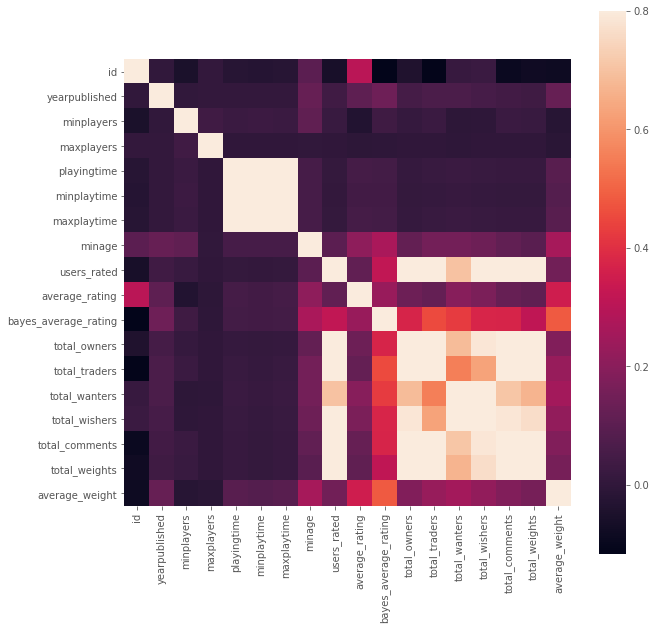

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,square=True,vmax=.8)

# Get all the columns from the dataframe

In [18]:
columns = games.columns.tolist()

In [19]:
columns

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

# Remove the columns we don't want

In [21]:
X = games.drop(['average_rating','bayes_average_rating','type','name','id'],axis = 1)

# Store the variable we 'll be predicting on

In [22]:
y = games['average_rating']

# Generating training and testing dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state =42)

# Import Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model class


In [25]:
lr = LinearRegression()

# Fit the model

In [26]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Generate  prediction for the test set

In [27]:
prediction = lr.predict(X_test)

# Compute error between our test prediction and actual values

In [28]:
mean_squared_error(prediction,y_test)

2.0805075052886335

# Import Random forest model

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model

In [37]:
rfr = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=42)

# Fit the model

In [38]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

# Generate Prediction for the test set

In [39]:
prediction = rfr.predict(X_test)

# Compute error between our test prediction and actual values

In [40]:
mean_squared_error(prediction,y_test)

1.4560546665229543

# Make prediction with both model

In [58]:
rating_LR = lr.predict(X_test.iloc[0].values.reshape(1,-1))
rating_RFR = rfr.predict(X_test.iloc[0].values.reshape(1,-1))

In [59]:
rating_LR,rating_RFR, y_test.iloc[0]

(array([6.17838717]), array([5.35728678]), 5.45833)